In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [27]:
data = pd.read_csv('NIFTY-50_data -2016-2021.csv')
data['Date'] =pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2016-01-01,7938.45,7972.55,7909.80,7963.20,64843836,2613.91
2016-01-04,7924.55,7937.55,7781.10,7791.30,138864905,5897.08
2016-01-05,7828.40,7831.20,7763.25,7784.65,149672973,5948.51
2016-01-06,7788.05,7800.95,7721.20,7741.00,151715828,6722.17
2016-01-07,7673.35,7674.95,7556.60,7568.30,194732861,7803.21


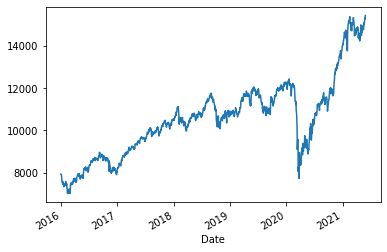

<Figure size 7200x3600 with 0 Axes>

In [28]:
def get_picture(data = data):
    data['Open'].plot()
    plt.figure(figsize=(100,50))
    plt.show()
get_picture()

得到1327個樣本
1061 10
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 10, 50)            10400     
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________
訓練中...
Epoch 1/300
17/17 [==============================] - 6s 88ms/step - loss: 0.1240 - val_loss: 0.1093
Epoch 2/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0423 - val_loss: 0.0568
Epoch 3/300
17/17 [==============================] - 0s 21ms/step - loss: 0.0365 - val_loss: 0.0407
Epoch 4/300
17/17 [==============================] - 0

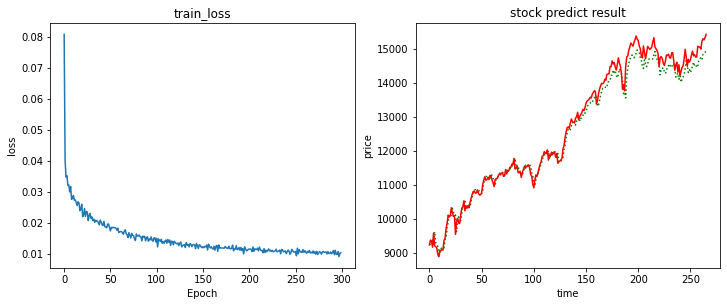

In [31]:
def processing(data = data, long = 11):
    data['Open'] =  data['Open'].astype(float)
    sample = len(data) - long +1
    print('得到{}個樣本'.format(sample))
    data_sample = []
    for i in range(sample) :
        data_sample.append(data['Open'][i:i+long])
    data_sample = np.array(data_sample)
    return data_sample
def lstm(input_data = None):
  scaler_x = MinMaxScaler()
  scaler_y = MinMaxScaler()
  x = input_data[:, :-1]
  y = input_data[:, -1]
  x = scaler_x.fit_transform(x)
  y = scaler_y.fit_transform(np.reshape(y, (len(y), 1)))
  spilt = int(len(y) * 0.8)
  x_train = x[:spilt]
  x_test = x[spilt:]
  y_train = y[:spilt]
  y_test = y[spilt:]
  print(x_train.shape[0], x_train.shape[1])
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  model = Sequential()
  model.add(LSTM(50, input_shape=(x_train.shape[1],1), return_sequences=True))
  model.add(LSTM(100))
  model.add(Dense(1, activation="linear"))
  model.compile(loss="mae", optimizer="rmsprop")
  model.summary()
  print("訓練中...")
  history = model.fit(x_train, y_train, batch_size=50, epochs=300, validation_split=0.2)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

  #劃出 train_loss
  ax1.set_title("train_loss")
  ax1.set_ylabel("loss")
  ax1.set_xlabel("Epoch")
  ax1.plot(history.history["loss"])

  predict = model.predict(x_test)
  y_test = scaler_y.inverse_transform(np.reshape(y_test, (len(y_test), 1)))
  predict = scaler_y.inverse_transform(predict)

  #劃出預測圖
  ax2.set_title("stock predict result")
  ax2.set_ylabel("price")
  ax2.set_xlabel("time")
  ax2.plot(predict, "g:")
  ax2.plot(y_test, "r-")
  fig.show()

sam = processing()
lstm(sam)